In [1]:
# 3.	Import the required packages with their customary aliases as follows:
#     `import pandas as pd`   
#     `import numpy as np`  
#     `import matplotlib.pyplot as plt`  
#     `import seaborn as sns`

import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`.

gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [ ]:
# Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
gdp_df.head()

In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [5]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?


**5.Ans: There are 8219 rows and 4 columns. The datatypes are as below: using .info()**

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [ ]:
gdp_df.describe()

In [9]:
# 6. Drop the `Value Footnotes` column
gdp_df_droppeddf = gdp_df.drop('Value Footnotes', axis=1)

In [10]:
gdp_df_droppeddf.describe()

,Year,Value
count,8219.000000,8219.000000
mean,2006.672345,20270.976242
std,9.782986,22532.004246
min,1990.000000,510.822823
25%,1998.000000,4284.868430
50%,2007.000000,11916.457927
75%,2015.000000,28543.305542
max,2023.000000,174339.077325


In [11]:
gdp_df_droppeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [12]:
# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df_clean = gdp_df_droppeddf.rename(columns={"Country or Area":"Country"}) #renamed only one

In [13]:
gdp_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  8219 non-null   object 
 1   Year     8219 non-null   int64  
 2   Value    8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [14]:
# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.-- (renaming remaining two, no change to Year column)
gdp_df_new = gdp_df_clean.rename(columns={"Value":"GDP_Per_Capita"})

In [15]:
gdp_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


**Dataframe details:**
**gdp_df--> gdp_df_droppeddf (dropped 'Value Footnotes' column) --> gdp_df_clean (rename "Country or Area column to Country)---> gdp_df_new (renamed value column to GDP Per Capita)**

In [17]:
# 7a. How many countries have data for all years?
#gdp_df_all_years = gdp_df_new["Country"].isin(gdp_df_new["Year"("1990":"2023")])
#gdp_df_years = gdp_df_new.groupby("Country") ["Year"].agg
#gdp_df_years = gdp_df_new.pivot_table(values= "Country", index = "Year", columns ="Country", fill_value=0)
gdp_df_min_year = gdp_df_new["Year"].min()
gdp_df_min_year

1990

In [18]:
gdp_df_max_year = gdp_df_new["Year"].max()
print(gdp_df_max_year)

2023


In [19]:
gdp_df_total_years = gdp_df_max_year - gdp_df_min_year +1
gdp_df_total_years

34

In [20]:
gdp_df_country_yearcount = gdp_df_new["Country"].value_counts()
gdp_df_country_yearcount 

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [21]:
gdp_df_country_count = (gdp_df_country_yearcount == gdp_df_total_years).value_counts()
gdp_df_country_count

count
True     228
False     19
Name: count, dtype: int64

**7a. Ans: 228 countries have data for all the years and 19 countries do not have data for all the years. Total countries 247 (228 +19).**

In [23]:
# 7b. Which countries are missing many years of data?
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts()< gdp_df_country_yearcount
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts([(gdp_df_new["Country"].value_counts())< gdp_df_country_yearcount]) 
#gdp_df_missing_yeardata = gdp_df_new["Country"].value_counts().isin(gdp_df_country==False) 
gdp_df_missing_yeardata = gdp_df_country_yearcount[gdp_df_country_yearcount<gdp_df_total_years]
print (gdp_df_missing_yeardata)

Country
Bhutan                       33
Syrian Arab Republic         33
Somalia                      33
Tonga                        33
Lebanon                      33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64


**7b. Ans: Countries missing data for many years: ['Bhutan', 'Syrian Arab Republic', 'Somalia', 'Tonga', 'Lebanon',
       'Greenland', 'West Bank and Gaza', 'Serbia', 'Montenegro', 'San Marino',
       'CuraÃ§ao', 'Afghanistan', 'Virgin Islands', 'Cayman Islands',
       'Faroe Islands', 'Kosovo', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'Djibouti']**

In [25]:
# 7c. Look at the number of observations per year.
#observations_per_year = gdp_df_missing_yeardata.plot(x="Year", y="Country", kind="line", marker='*') ##showing count of years for each country
#plt.legend("Country")
#plt.title("Observations_per_year")
#plt.show()

observations_per_year = gdp_df_new["Year"].value_counts() #Count of countries having data that year.
print(observations_per_year)

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64


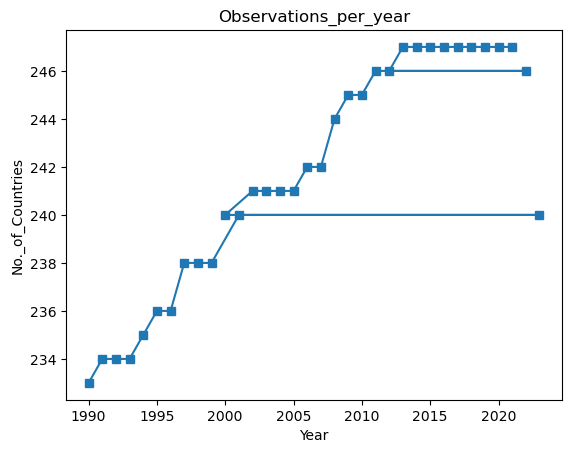

In [26]:
# 7d. What do you notice? 
observations_per_year_plot = observations_per_year.plot(x="Year", y="No_of_Observations", kind = "line", marker ='s')
plt.ylabel("No._of_Countries")
plt.title("Observations_per_year")
plt.show()

**7c,d. Ans: Observations (count of countries with data) is increasing every year.**

In [28]:
# 8a. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
gdp_2020 = gdp_df_new.loc[gdp_df_new["Year"]==2020]
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
27    Africa Eastern and Southern  2020     3861.111238
61     Africa Western and Central  2020     4622.731427
95                        Albania  2020    14650.395929
129                       Algeria  2020    14194.155748
...                           ...   ...             ...
8068               Virgin Islands  2020    45055.782930
8090           West Bank and Gaza  2020     5423.682547
8120                        World  2020    18600.986362
8154                       Zambia  2020     3391.595412
8188                     Zimbabwe  2020     2987.269823

[247 rows x 3 columns]


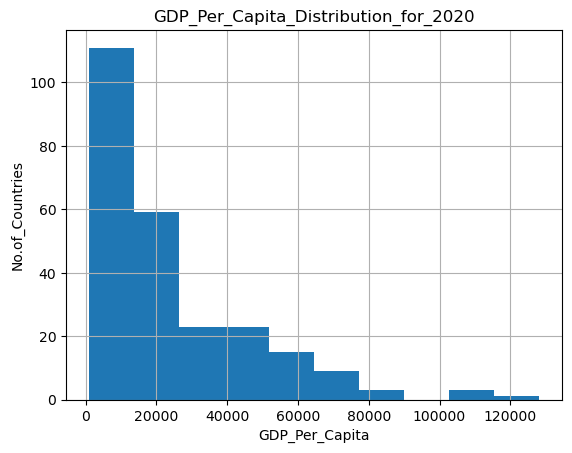

In [29]:
# 8b. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
# Create a histogram 
gdp_histogram = gdp_2020["GDP_Per_Capita"].hist()
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("No.of_Countries")
plt.show()

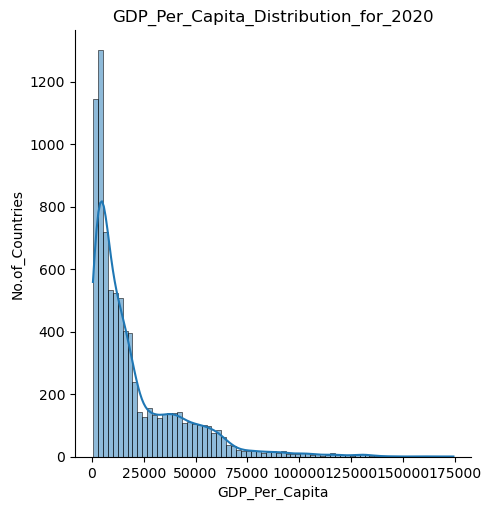

In [30]:
sns.displot(data=gdp_df_new["GDP_Per_Capita"], kde = True)
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("No.of_Countries")
plt.show()
# Why is bar showing more than 1200, when there are 247 countries?

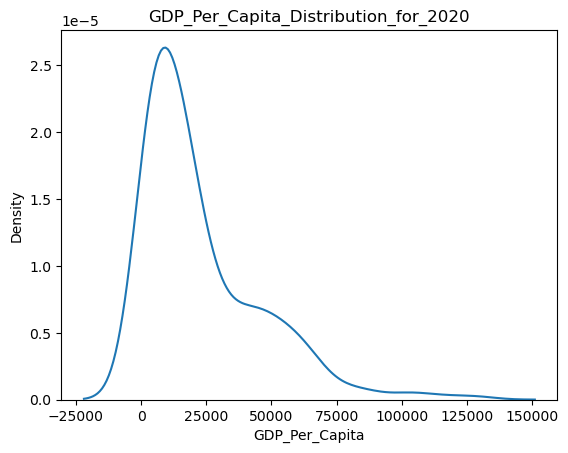

In [31]:
# 8c.  density plot
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita')
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.show()

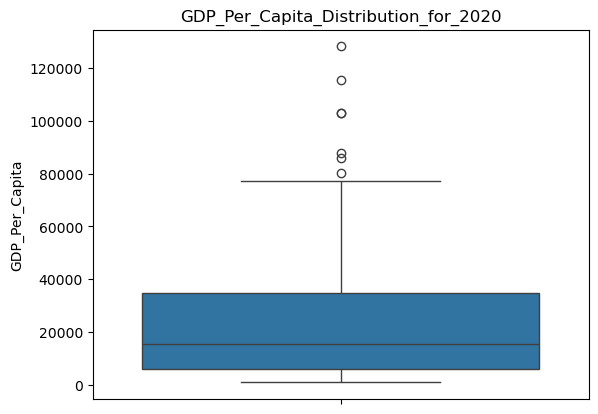

In [32]:
# 8d. boxplot
#sns.boxplot(x=gdp_2020["Country"],y=gdp_2020["GDP_Per_Capita"]) 
sns.boxplot(y=gdp_2020["GDP_Per_Capita"]) 
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.show()

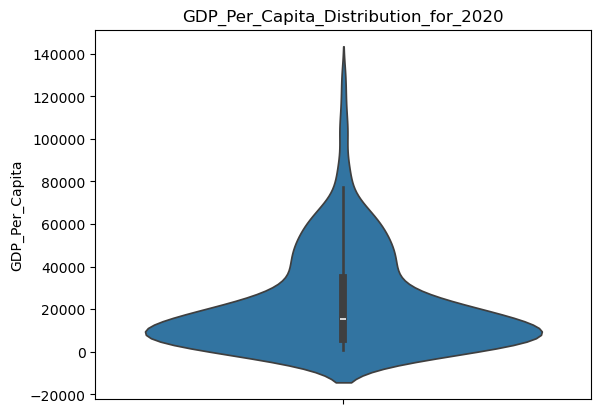

In [33]:
# 8e. violin plot
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("GDP_Per_Capita_Distribution_for_2020")
plt.show()

**8f. What do you notice when you look at these plots?
Most countries have GDP_Per_Capita income between 0 to 40000.**


**8g. How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
All plots shows the data is towards the lower values. 
The count of countries is represented only in Histogram.
The outliers are represented in most, however a Boxplot shows the outliers more clearly.**

In [36]:
# 9. What was the median GDP per capita value in 2020?
gdp_2020_mean = gdp_2020["GDP_Per_Capita"].mean()
print(gdp_2020_mean)

23044.942555569738


In [37]:
gdp_2020_median = gdp_2020["GDP_Per_Capita"].median()
print(gdp_2020_median)

15309.23598817024


**9. Ans: Median GDP per capita value in 2020 is 15309.23598817024**

In [39]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
gdp_decades = gdp_df_new.loc[gdp_df_new["Year"].isin([1990, 2000, 2010, 2020])]
print(gdp_decades)


                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
13                    Afghanistan  2010     2848.586061
23                    Afghanistan  2000     1617.826475
27    Africa Eastern and Southern  2020     3861.111238
37    Africa Eastern and Southern  2010     3863.836012
...                           ...   ...             ...
8184                       Zambia  1990     2425.111287
8188                     Zimbabwe  2020     2987.269823
8198                     Zimbabwe  2010     2572.769992
8208                     Zimbabwe  2000     4071.022001
8218                     Zimbabwe  1990     4013.299059

[965 rows x 3 columns]


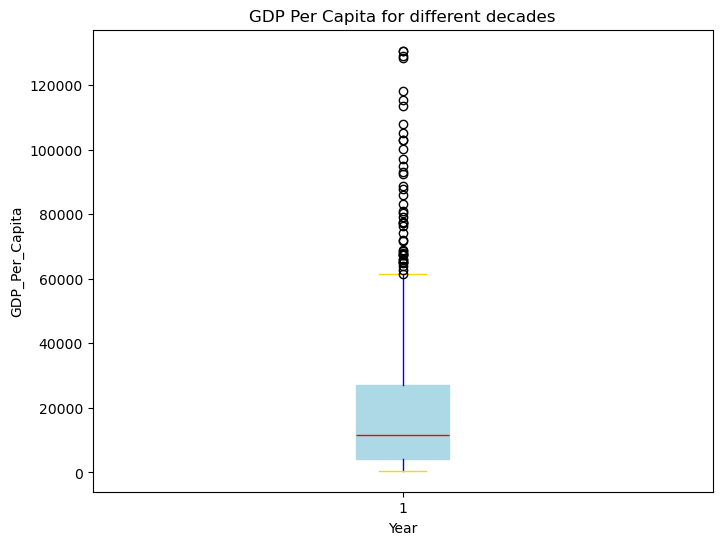

In [40]:
# 	* A boxplot
fig, ax = plt.subplots(figsize=(8,6))
boxplot = ax.boxplot(gdp_decades['GDP_Per_Capita'], patch_artist=True)
box_color = 'lightblue'
whisker_color = 'blue'
cap_color = 'gold'
flier_color = 'red'
median_color = 'red'
plt.setp(boxplot['boxes'], color=box_color)
plt.setp(boxplot['whiskers'], color=whisker_color)
plt.setp(boxplot['caps'], color=cap_color)
plt.setp(boxplot['fliers'], color=flier_color)
plt.setp(boxplot['medians'], color=median_color)
ax.set_xlabel('Year')
ax.set_ylabel('GDP_Per_Capita')
ax.set_title('GDP Per Capita for different decades')
plt.show()

**Different decades are not shown using matplotlib.**

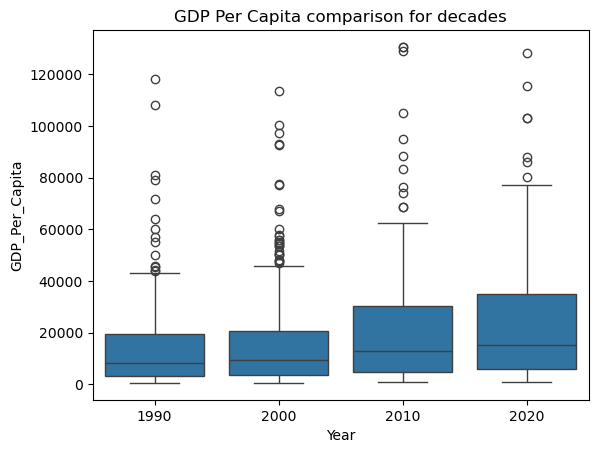

In [42]:
# 	boxplot using sns
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.title("GDP Per Capita comparison for decades")
plt.show()

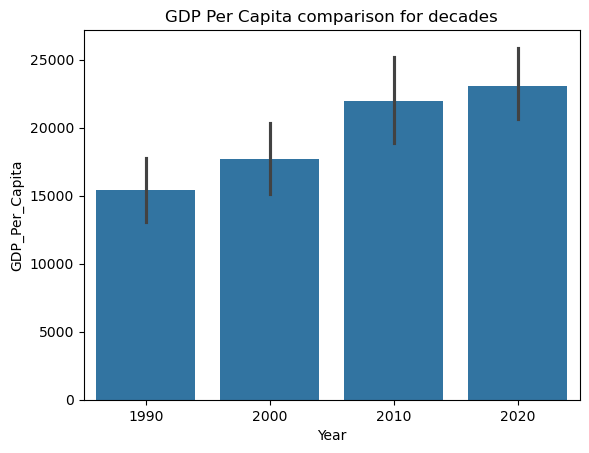

In [43]:
# * A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
sns.barplot(x="Year", y="GDP_Per_Capita", data= gdp_decades)
plt.title("GDP Per Capita comparison for decades")
plt.show()

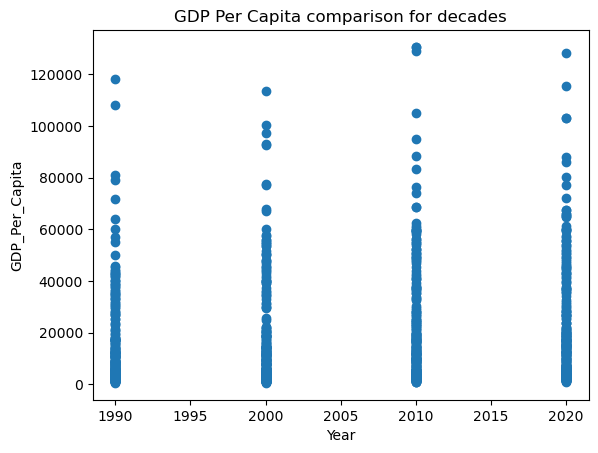

In [44]:
# 	* A scatterplot
plt.scatter(gdp_decades["Year"],gdp_decades["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP Per Capita comparison for decades")
plt.show()

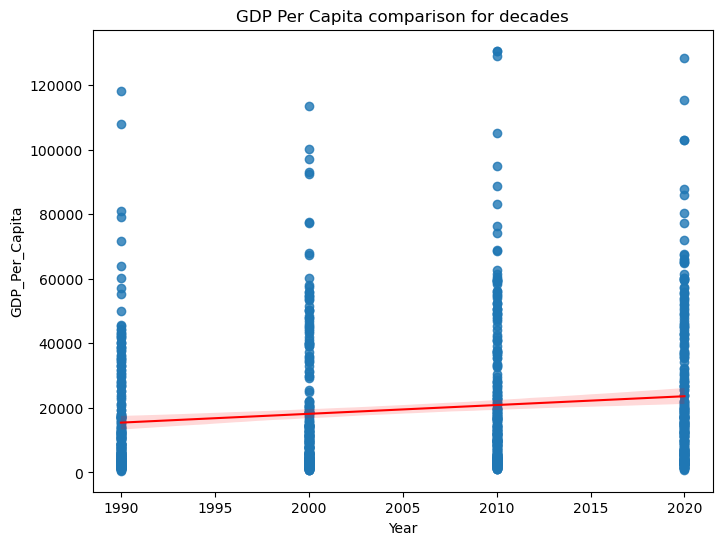

In [45]:
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
fig, ax=plt.subplots(figsize=(8,6))
sns.regplot(
x=gdp_decades["Year"], 
y=gdp_decades["GDP_Per_Capita"],
line_kws={"color":"red", "linewidth":1.5},
ax=ax)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP Per Capita comparison for decades")
plt.show()

In [46]:
#Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

**GDP values have increased over time. Boxplot using seaborn shows values for different years, however matplotlib does not.
Barplot is easier to understand than others.
The linear representation on seaborn scatter plot is helpful in understanding that GDP values have increased for certain countries.**

In [48]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?
gdp_100k = gdp_df_new[gdp_df_new["GDP_Per_Capita"]>100000]
print(gdp_100k)

                   Country  Year  GDP_Per_Capita
750                Bermuda  2011   101174.504104
751                Bermuda  2010   105121.639689
752                Bermuda  2009   108091.644563
753                Bermuda  2008   115015.749469
754                Bermuda  2007   117742.118950
...                    ...   ...             ...
7821  United Arab Emirates  1996   100563.698291
7822  United Arab Emirates  1995   101412.082063
7825  United Arab Emirates  1992   101100.487512
7826  United Arab Emirates  1991   103098.537132
7827  United Arab Emirates  1990   108057.042464

[106 rows x 3 columns]


In [49]:
gdp_100k_first_country = gdp_100k.sort_values(["Year", "Country"], ascending = [True, False])
print(gdp_100k_first_country)

                   Country  Year  GDP_Per_Capita
7827  United Arab Emirates  1990   108057.042464
974                 Brunei  1990   118163.683198
7826  United Arab Emirates  1991   103098.537132
973                 Brunei  1991   118220.683619
7825  United Arab Emirates  1992   101100.487512
...                    ...   ...             ...
6511             Singapore  2023   127543.554752
6116                 Qatar  2023   116159.142559
4457      Macao SAR, China  2023   104961.643485
4423            Luxembourg  2023   130373.477942
3490               Ireland  2023   115401.125283

[106 rows x 3 columns]


**11. Ans: First country to have a GDP > $100,000 is United Arab Emirates in the year 1990 with GDP_Per_Capita of 108057.042464**

In [51]:
# 12a. Which country had the highest GDP per capita in 2020? 
#gdp_2020_highest = gdp_2020.sort_values(["GDP_Per_Capita"], ascending = [False])
gdp_2020_highest = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax(), ["GDP_Per_Capita", "Country"]]
print(gdp_2020_highest)


GDP_Per_Capita    128256.560341
Country              Luxembourg
Name: 4426, dtype: object


**12a. Ans: Luxembourg had the highest GDP per capita of 128256.560341 in 2020**

         Country  Year  GDP_Per_Capita
4423  Luxembourg  2023   130373.477942
4424  Luxembourg  2022   134507.667531
4425  Luxembourg  2021   135379.291201
4426  Luxembourg  2020   128256.560341
4427  Luxembourg  2019   131609.099616
4428  Luxembourg  2018   130415.193065
4429  Luxembourg  2017   131353.485059
4430  Luxembourg  2016   132836.085831
4431  Luxembourg  2015   129293.707435
4432  Luxembourg  2014   129443.183641
4433  Luxembourg  2013   129142.843309
4434  Luxembourg  2012   128099.279571
4435  Luxembourg  2011   129083.129771
4436  Luxembourg  2010   130620.266278
4437  Luxembourg  2009   128205.455863
4438  Luxembourg  2008   134973.375929
4439  Luxembourg  2007   137821.419596
4440  Luxembourg  2006   129480.260595
4441  Luxembourg  2005   124095.617345
4442  Luxembourg  2004   122956.102288
4443  Luxembourg  2003   119652.627050
4444  Luxembourg  2002   118024.021417
4445  Luxembourg  2001   115540.354519
4446  Luxembourg  2000   113436.588273
4447  Luxembourg  1999   

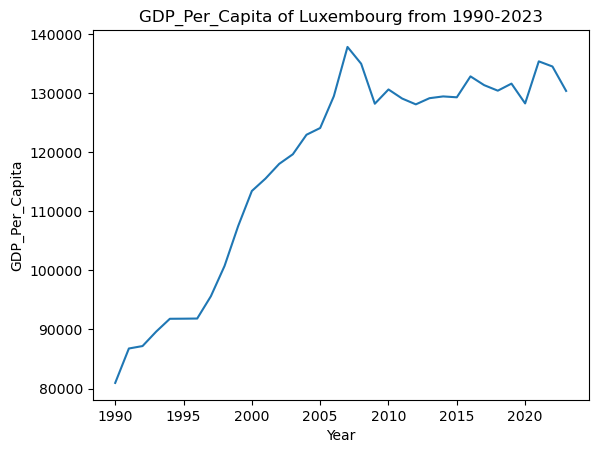

In [53]:
# 12b. Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
gdp_Luxembourg = gdp_df_new[gdp_df_new["Country"]=="Luxembourg"]
print(gdp_Luxembourg)

plt.plot(gdp_Luxembourg["Year"], gdp_Luxembourg["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita of Luxembourg from 1990-2023")
plt.show()


**12b. Ans: GDP per capita for Luxembourg kept increasing till 2007, then started to dip a little.**

In [55]:
# 13a. Which country had the lowest GDP per capita in 2020? 
gdp_2020_lowest = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmin(),["GDP_Per_Capita", "Country"]]
print(gdp_2020_lowest)

GDP_Per_Capita    833.920257
Country              Burundi
Name: 1046, dtype: object


**13a. Ans: Burundi had the lowest GDP per capita of 833.920257 in 2020**

      Country  Year  GDP_Per_Capita
1043  Burundi  2023      828.861074
1044  Burundi  2022      829.387160
1045  Burundi  2021      836.665571
1046  Burundi  2020      833.920257
1047  Burundi  2019      855.732720
1048  Burundi  2018      868.555508
1049  Burundi  2017      880.993440
1050  Burundi  2016      897.459046
1051  Burundi  2015      918.557193
1052  Burundi  2014      977.765840
1053  Burundi  2013      970.375392
1054  Burundi  2012      958.657403
1055  Burundi  2011      951.188460
1056  Burundi  2010      947.621417
1057  Burundi  2009      944.629926
1058  Burundi  2008      957.222664
1059  Burundi  2007      951.290083
1060  Burundi  2006      954.190854
1061  Burundi  2005      938.381597
1062  Burundi  2004      965.204118
1063  Burundi  2003      955.669204
1064  Burundi  2002      998.561289
1065  Burundi  2001      983.396847
1066  Burundi  2000      988.036863
1067  Burundi  1999     1017.497778
1068  Burundi  1998     1052.807034
1069  Burundi  1997     1024

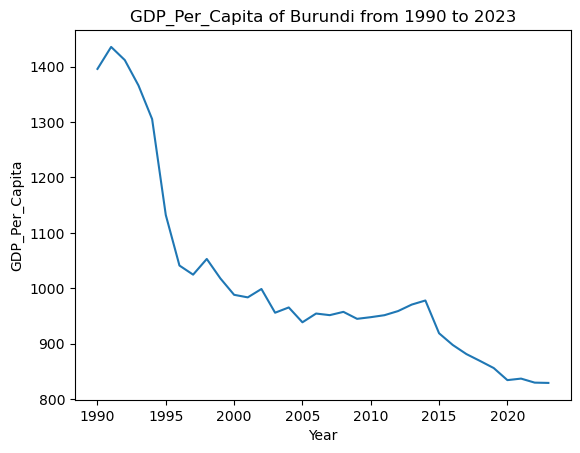

In [57]:
#13b. Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
gdp_Burundi = gdp_df_new[gdp_df_new["Country"]=="Burundi"]
print(gdp_Burundi)
plt.plot(gdp_Burundi["Year"], gdp_Burundi["GDP_Per_Capita"])
plt.title("GDP_Per_Capita of Burundi from 1990 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.show()

**13b. Ans: GDP per Capita of Burundi dropped a lot in 1995 and since then have up and down, however, since 2015 it kept going down.**

In [59]:
#**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
#Which countries had lower GDP per capita in 2020 than in 1990?
gdp_1990 = gdp_df_new.loc[gdp_df_new["Year"]==1990]
print(gdp_1990)

                          Country  Year  GDP_Per_Capita
57    Africa Eastern and Southern  1990     3386.854480
91     Africa Western and Central  1990     3299.401375
125                       Albania  1990     5327.747458
159                       Algeria  1990    11728.545729
193                       Andorra  1990    50036.300776
...                           ...   ...             ...
8031                      Vanuatu  1990     3101.680551
8065                     Viet Nam  1990     2467.964601
8150                        World  1990    11207.386344
8184                       Zambia  1990     2425.111287
8218                     Zimbabwe  1990     4013.299059

[233 rows x 3 columns]


In [60]:
gdp_1990_2020 = gdp_df_new[gdp_df_new["Year"].isin([1990,2020])]\
.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year",fill_value=0)
print(gdp_1990_2020)

Year                                 1990          2020
Country                                                
Afghanistan                      0.000000   2769.685745
Africa Eastern and Southern   3386.854480   3861.111238
Africa Western and Central    3299.401375   4622.731427
Albania                       5327.747458  14650.395929
Algeria                      11728.545729  14194.155748
...                                   ...           ...
Virgin Islands                   0.000000  45055.782930
West Bank and Gaza               0.000000   5423.682547
World                        11207.386344  18600.986362
Zambia                        2425.111287   3391.595412
Zimbabwe                      4013.299059   2987.269823

[247 rows x 2 columns]


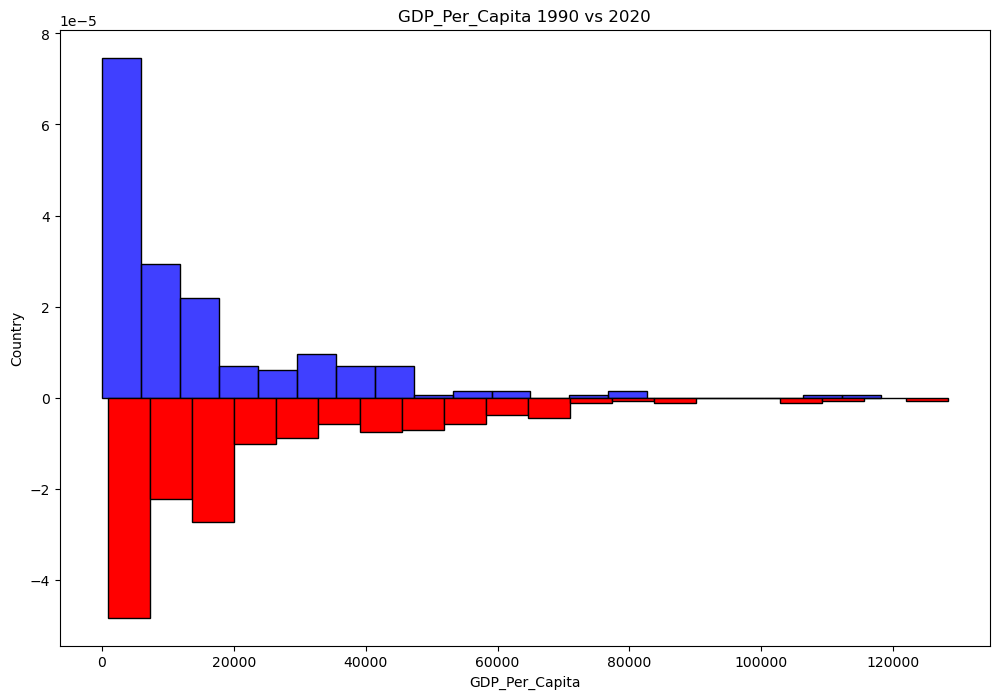

In [61]:
# dataframe
gdp_1990_2020_compare = pd.DataFrame({
    '1990': np.random.normal(size=1000),
    '2020': np.random.normal(loc=2, size=1000)
})    

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for 1990
sns.histplot(x = gdp_1990_2020[1990], stat="density", bins=20, edgecolor='black', color='blue', label="1990")

# plot histogram chart for 2020
n_bins=20

# get positions and heights of bars
heights, bins = np.histogram(gdp_1990_2020[2020], density=True, bins=n_bins)

# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2)

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black', color='red', label="2020")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Country")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.show()

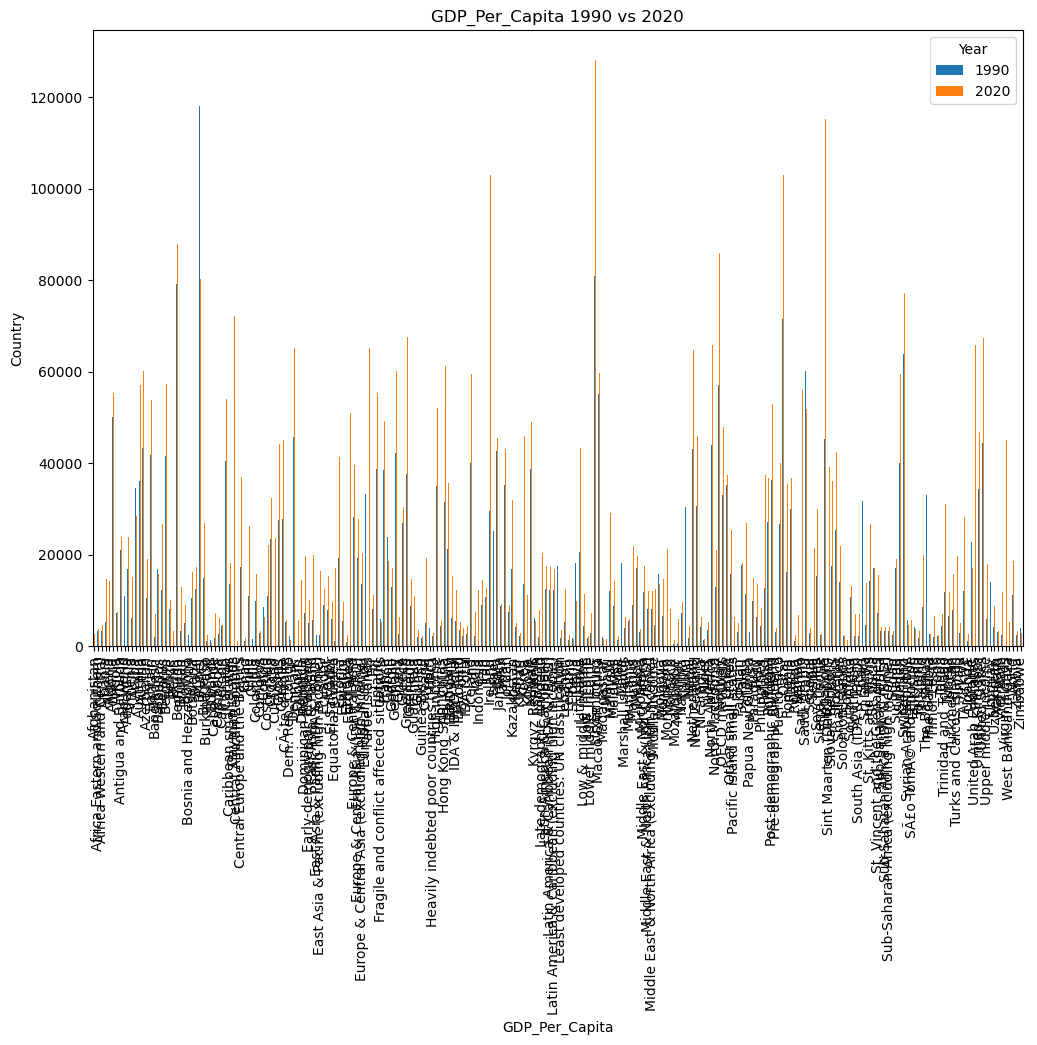

In [62]:
# # plot
gdp_1990_2020.plot(kind="bar")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Country")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.show()

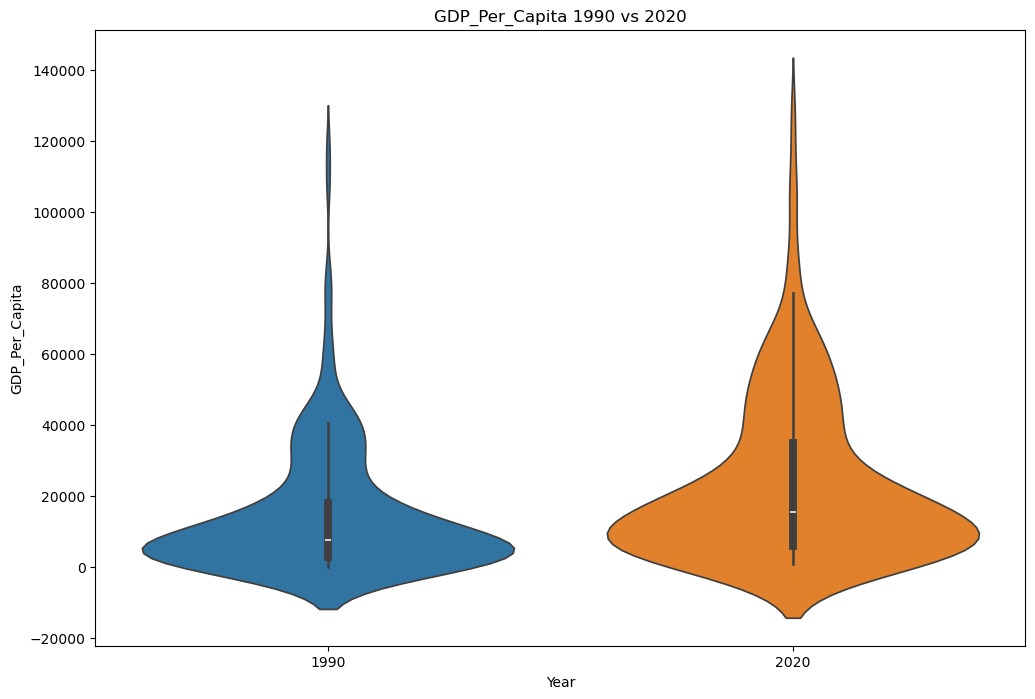

In [63]:
sns.violinplot(data=gdp_1990_2020)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.show()

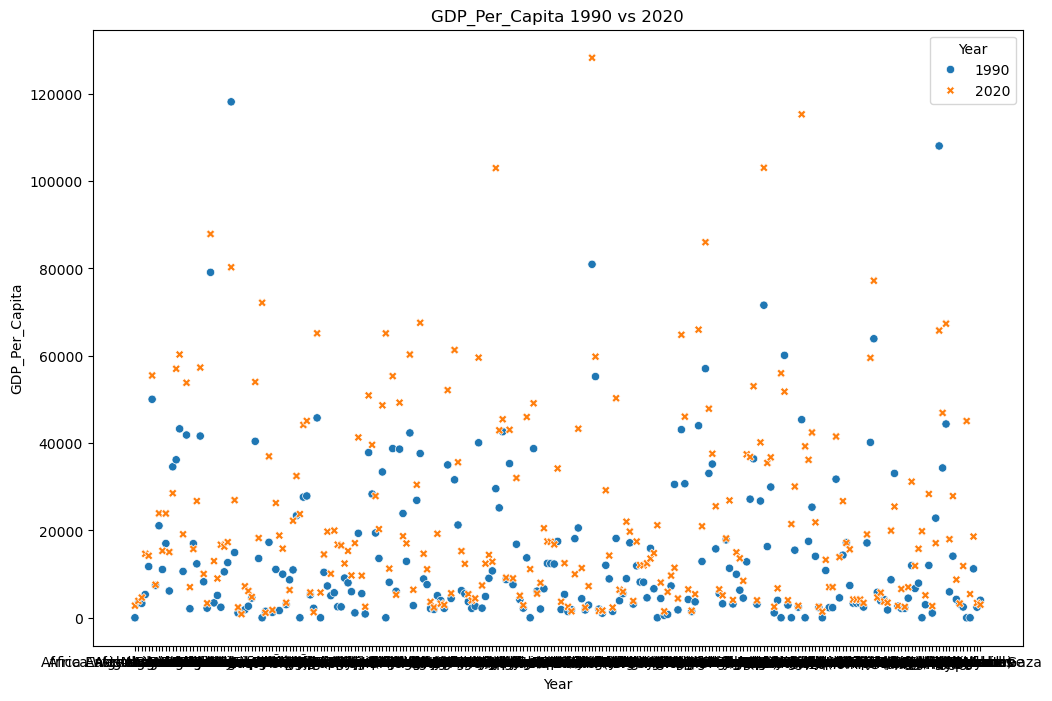

In [64]:
sns.scatterplot(data=gdp_1990_2020)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.show()

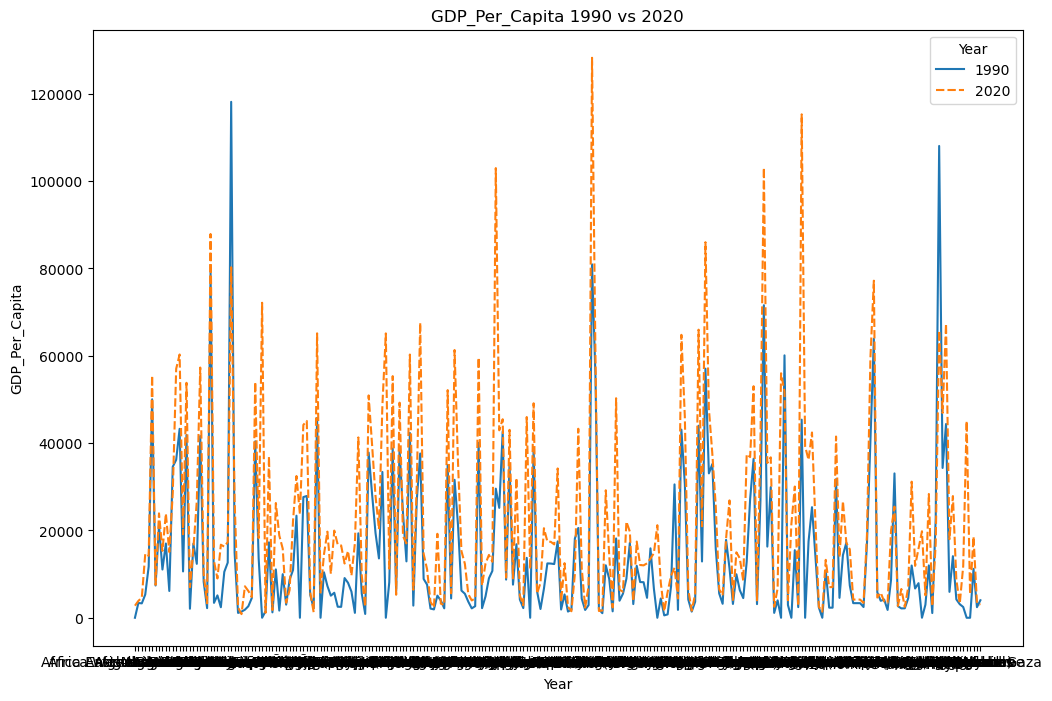

In [65]:
sns.lineplot(data=gdp_1990_2020)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.title("GDP_Per_Capita 1990 vs 2020")
plt.show()

**Yes, in general, coutries had a higher GDP per capita in 2020 than in 1990, except few.** 

In [67]:
#Which countries had lower GDP per capita in 2020 than in 1990?
gdp_1990_2020_lower = gdp_1990_2020[gdp_1990_2020[2020] < gdp_1990_2020[1990]]
print(gdp_1990_2020_lower)

Year                                               1990          2020
Country                                                              
Aruba                                      34579.220640  28521.688852
Barbados                                   16976.761648  15749.038017
Brunei                                    118163.683198  80280.897948
Burundi                                     1396.077627    833.920257
Central African Republic                    1481.252551   1136.570530
Congo                                       8699.526839   6350.509134
Dem. Rep. Congo                             2172.001597   1277.632863
Fragile and conflict affected situations    6062.707946   5271.014406
Gabon                                      23884.810700  18681.484074
Haiti                                       3946.365646   3229.475544
Kyrgyz Republic                             6095.681086   5537.795885
Liberia                                     1866.405481   1497.376924
Libya               

In [83]:
# 14a. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
# Check the arguments for the read_csv function to find ones that can help correct the errors 
# (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 

internet_df = pd.read_csv('../data/internet.csv', skip_blank_lines=True, nrows=6083)

In [85]:
# 14b. Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. 


internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [87]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [89]:
#14c. Also, check the datatypes of the columns.
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [91]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
internet_df_dropped = internet_df.drop('Value Footnotes',axis=1)
print(internet_df_dropped)
internet_df_clean = internet_df_dropped.rename(columns={"Country or Area" : "Country", "Value" : "Internet_Users_Pct"})
print(internet_df_clean)
internet_df_clean.info()
internet_df_clean.describe()
internet_df_clean.head()
internet_df_clean.tail()


     Country or Area  Year      Value
0        Afghanistan  2019  17.600000
1        Afghanistan  2018  16.800000
2        Afghanistan  2017  13.500000
3        Afghanistan  2016  11.000000
4        Afghanistan  2015   8.260000
...              ...   ...        ...
6078        Zimbabwe  1997   0.033080
6079        Zimbabwe  1996   0.016790
6080        Zimbabwe  1995   0.007684
6081        Zimbabwe  1994   0.001739
6082        Zimbabwe  1990   0.000000

[6083 rows x 3 columns]
          Country  Year  Internet_Users_Pct
0     Afghanistan  2019           17.600000
1     Afghanistan  2018           16.800000
2     Afghanistan  2017           13.500000
3     Afghanistan  2016           11.000000
4     Afghanistan  2015            8.260000
...           ...   ...                 ...
6078     Zimbabwe  1997            0.033080
6079     Zimbabwe  1996            0.016790
6080     Zimbabwe  1995            0.007684
6081     Zimbabwe  1994            0.001739
6082     Zimbabwe  1990            

,Country,Year,Internet_Users_Pct
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


In [ ]:
#internet_df_clean_drop_footnote = internet_df_clean.drop(["footnoteSeqID", "Footnote"],axis=1)
#internet_df_clean["Internet_Users_Pct"] = pd.to_numeric(internet_df_clean["Internet_Users_Pct"],errors="coerce")
#internet_df_clean.info()
#internet_df_clean_year = internet_df_clean["Year"].astype(int)
#print(internet_df_clean_year)

In [93]:
# 16. Look at the number of observations in this dataset per year. What do you notice?
internet_df_observations = internet_df_clean["Year"].value_counts()
print(internet_df_observations)

Year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64


**16. Ans: Year 1990 had the most observations, it decreased in 2007 and after that remained constant for few years and then kept going down.**

In [96]:
# 17. What is the first year to have a non-zero internet users percentage value?
internet_df_non_zero = internet_df_clean[internet_df_clean["Internet_Users_Pct"] > 0].min()
print(internet_df_non_zero)

Country               Afghanistan
Year                         1990
Internet_Users_Pct       0.000018
dtype: object


**17. Ans: The first year to have a non-zero internet users percentage value is 1990.**

In [102]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
internet_df_2000 = internet_df_clean[internet_df_clean["Year"]==2000]
print(internet_df_2000)

                  Country  Year  Internet_Users_Pct
42                Albania  2000            0.114097
71                Algeria  2000            0.491706
100               Andorra  2000           10.538800
128                Angola  2000            0.105046
150              Anguilla  2000           22.405400
...                   ...   ...                 ...
5974  Virgin Islands (US)  2000           13.815100
5994    Wallis and Futuna  2000            4.768070
6017                Yemen  2000            0.082500
6045               Zambia  2000            0.191072
6075             Zimbabwe  2000            0.401434

[210 rows x 3 columns]


In [104]:
internet_df_2014 = internet_df_clean[internet_df_clean["Year"]==2014]
print(internet_df_2014)

                  Country  Year  Internet_Users_Pct
5             Afghanistan  2014              7.0000
28                Albania  2014             54.3000
57                Algeria  2014             29.5000
87                Andorra  2014             86.1000
114                Angola  2014             21.3623
...                   ...   ...                 ...
5937             Viet Nam  2014             41.0000
5960  Virgin Islands (US)  2014             50.0700
6003                Yemen  2014             22.5500
6031               Zambia  2014              6.5000
6061             Zimbabwe  2014             16.3647

[204 rows x 3 columns]


In [108]:
internet_df_2000_2014_compare = internet_df_clean[internet_df_clean["Year"].isin([2000,2014])]\
.pivot_table(values="Internet_Users_Pct", index="Country", columns="Year", fill_value=0)
print(internet_df_2000_2014_compare)

Year                      2000     2014
Country                                
Afghanistan           0.000000   7.0000
Albania               0.114097  54.3000
Algeria               0.491706  29.5000
Andorra              10.538800  86.1000
Angola                0.105046  21.3623
...                        ...      ...
Virgin Islands (US)  13.815100  50.0700
Wallis and Futuna     4.768070   0.0000
Yemen                 0.082500  22.5500
Zambia                0.191072   6.5000
Zimbabwe              0.401434  16.3647

[219 rows x 2 columns]


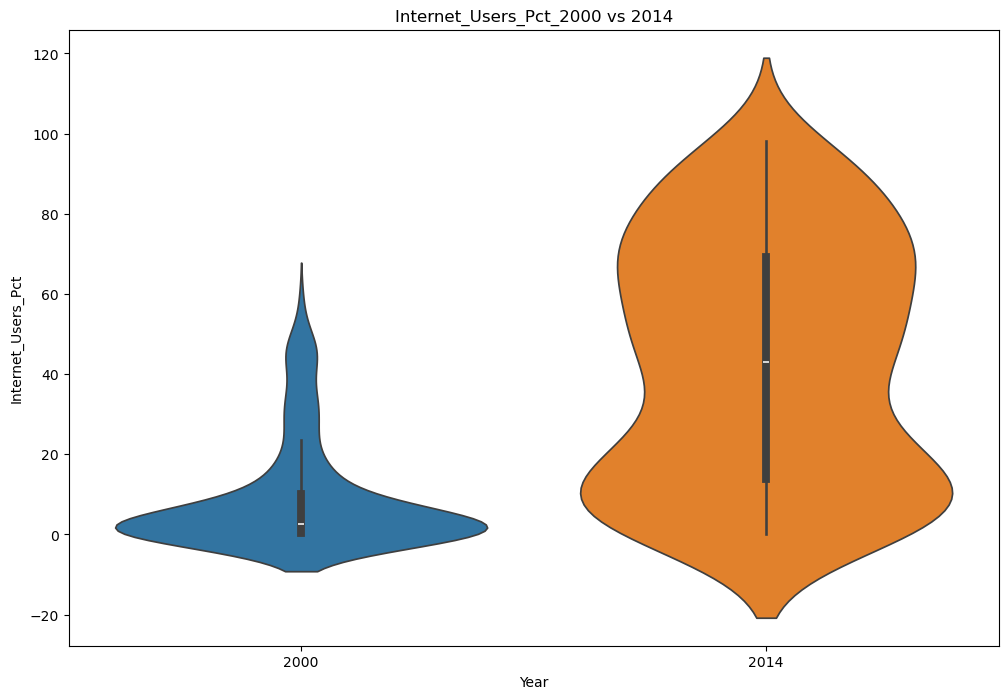

In [110]:
sns.violinplot(data=internet_df_2000_2014_compare)
plt.xlabel("Year")
plt.ylabel("Internet_Users_Pct")
plt.title("Internet_Users_Pct_2000 vs 2014")
plt.show()

**18. Ans: Internet_Users_Pct has increased significantly in 2014 for all the countries.**

In [174]:
# 19. For how many countries was the percentage of internet users below 5% in 2014?
internet_df_below_5 = internet_df_clean[(internet_df_clean["Internet_Users_Pct"]<5) & (internet_df_clean["Year"]==2014)]
print(internet_df_below_5["Country"].value_counts())

Country
Burundi                             1
Central African Republic            1
Chad                                1
Democratic Republic of the Congo    1
Eritrea                             1
Guinea-Bissau                       1
Madagascar                          1
Niger                               1
Somalia                             1
South Sudan                         1
Name: count, dtype: int64


In [178]:
internet_df_below_5.describe()

,Year,Internet_Users_Pct
count,10.0,10.000000
mean,2014.0,2.313107
std,0.0,0.997248
min,2014.0,0.990000
25%,2014.0,1.344010
50%,2014.0,2.650000
75%,2014.0,2.975000
max,2014.0,3.700000


**19. Ans: 10 countries had the percentage of internet users below 5% in 2014.**

<Axes: xlabel='Internet_Users_Pct', ylabel='Country'>

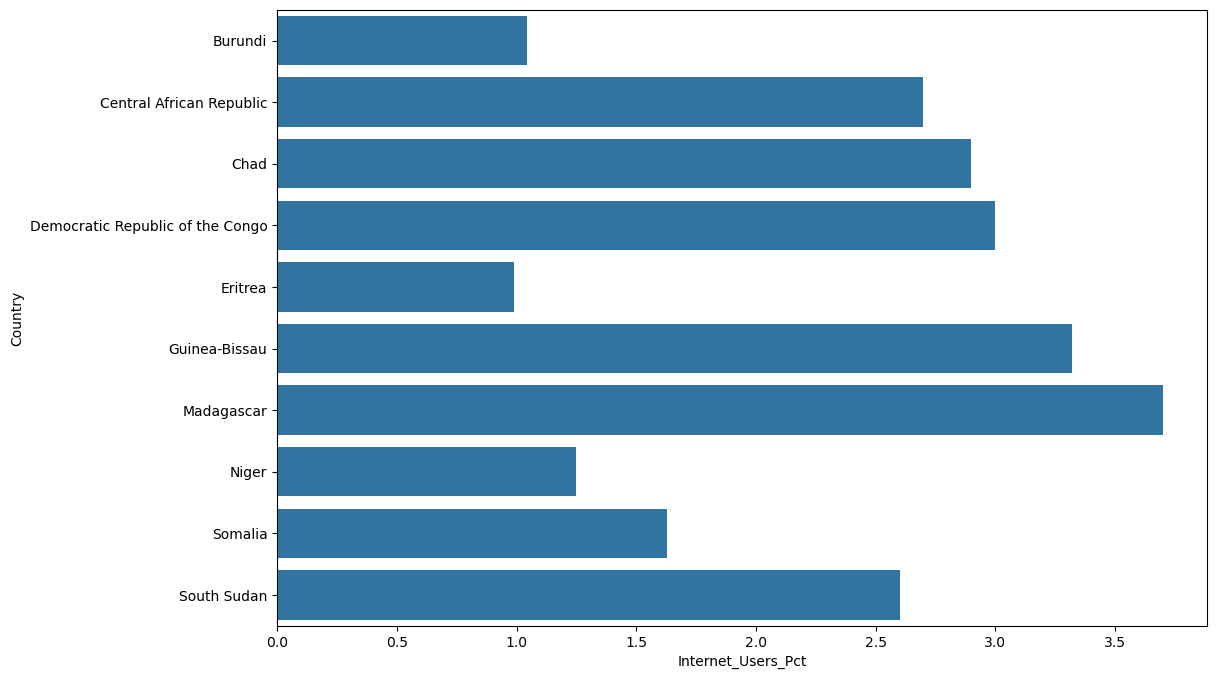

In [195]:
sns.barplot(x="Internet_Users_Pct", y="Country",data=internet_df_below_5)

In [205]:
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
# Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
gdp_and_internet_use = pd.merge(gdp_df_new, internet_df_clean, on=["Country", "Year"], how="outer")
print(gdp_and_internet_use)
# gdp_df_new=8219 rows, internet_df_clean= 6083 rows

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  1990             NaN            0.000000
1     Afghanistan  2000     1617.826475                 NaN
2     Afghanistan  2001     1454.110782            0.004723
3     Afghanistan  2002     1774.308743            0.004561
4     Afghanistan  2003     1815.928200            0.087891
...           ...   ...             ...                 ...
9494     Zimbabwe  2019     3294.806084           26.588300
9495     Zimbabwe  2020     2987.269823           29.298600
9496     Zimbabwe  2021     3184.785451           32.461600
9497     Zimbabwe  2022     3323.121932           32.561500
9498     Zimbabwe  2023     3442.251327                 NaN

[9499 rows x 4 columns]


In [378]:
# 21a. Find the three countries with the highest internet users percentage in 2014.

gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
15                    Afghanistan  2014     3017.942544              7.0000
49    Africa Eastern and Southern  2014     4052.851526                 NaN
83     Africa Western and Central  2014     4816.917355                 NaN
117                       Albania  2014    12788.747231             54.3000
151                       Algeria  2014    15073.762940             29.5000
...                           ...   ...             ...                 ...
9361           West Bank and Gaza  2014     5990.426615                 NaN
9395                        World  2014    17307.606891                 NaN
9424                        Yemen  2014             NaN             22.5500
9455                       Zambia  2014     3585.577485              6.5000
9489                     Zimbabwe  2014     3360.552173             16.3647

[285 rows x 4 columns]


In [370]:
# Sort "Internet_Users_Pct" to find top three
gdp_and_internet_use_2014_sorted = gdp_and_internet_use_2014.sort_values("Internet_Users_Pct", ascending=False)
print(gdp_and_internet_use_2014_sorted) 

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944                      Iceland  2014    57981.199448             98.1580
2867  Falkland (Malvinas) Islands  2014             NaN             97.6000
824                       Bermuda  2014    92298.387811             96.8000
6467                       Norway  2014    84753.668395             96.3005
2168                      Denmark  2014    60992.212220             95.9935
...                           ...   ...             ...                 ...
8867                     TÃ¼rkiye  2014    24573.488878                 NaN
9103          Upper middle income  2014    15312.435710                 NaN
9292               Virgin Islands  2014    42853.898660                 NaN
9361           West Bank and Gaza  2014     5990.426615                 NaN
9395                        World  2014    17307.606891                 NaN

[285 rows x 4 columns]


In [372]:
# Top three
gdp_and_internet_use_2014_top_three = gdp_and_internet_use_2014_sorted[:3]
print(gdp_and_internet_use_2014_top_three)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944                      Iceland  2014    57981.199448              98.158
2867  Falkland (Malvinas) Islands  2014             NaN              97.600
824                       Bermuda  2014    92298.387811              96.800


**Top three countries with highest Internet Users are Iceland, Falkland (Malvinas) Islands and Bermuda.**

In [258]:
# Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time 
# for these three countries.

gdp_and_internet_use_top_three_countries = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Falkland (Malvinas) Islands", "Bermuda"])]
print(gdp_and_internet_use_top_three_countries)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
800   Bermuda  1990    79109.890650              0.0000
801   Bermuda  1991    75754.494259                 NaN
802   Bermuda  1992    75160.932166                 NaN
803   Bermuda  1993    76883.813796                 NaN
804   Bermuda  1994    76850.912239                 NaN
...       ...   ...             ...                 ...
3949  Iceland  2019    65065.905682             99.5049
3950  Iceland  2020    59575.190393             99.5328
3951  Iceland  2021    61685.835611             99.6870
3952  Iceland  2022    65563.920870             99.8565
3953  Iceland  2023    66880.065810                 NaN

[91 rows x 4 columns]


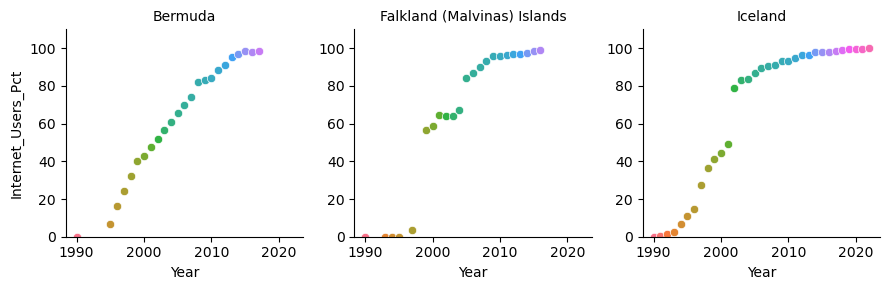

In [330]:
g = sns.FacetGrid(gdp_and_internet_use_top_three_countries, col="Country", sharey=False, ylim=(0,110), hue="Year")
g.map_dataframe(sns.scatterplot,x="Year",y= "Internet_Users_Pct")
g.set_titles(col_template='{col_name}')

In [274]:
type(g)

seaborn.axisgrid.FacetGrid

**21. Ans: What do you notice? For all three countries, the Users kept increasing and are more than 99 percent. For Bermuda, there was no data available till 1995, however since 1996 the count kept going up every year. Foe Falkland Island and Icelans, the data was missing for few years but kept going up since its availability.** 

In [ ]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

**22. Ans: Already did this while solving Q21.**

In [382]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2014,3017.942544,7.0
49,Africa Eastern and Southern,2014,4052.851526,NaN
83,Africa Western and Central,2014,4816.917355,NaN
117,Albania,2014,12788.747231,54.3
151,Algeria,2014,15073.762940,29.5


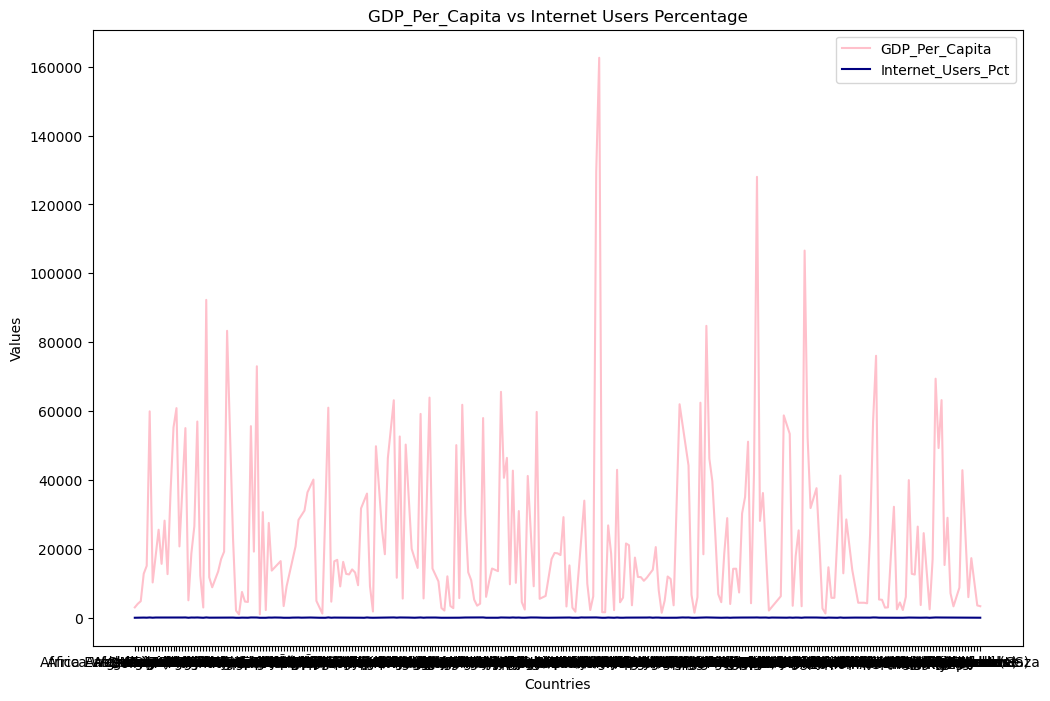

In [480]:
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 

sns.lineplot(x="Country", y="GDP_Per_Capita", data=gdp_and_internet_use_2014, label="GDP_Per_Capita", color="pink")
sns.lineplot(x="Country", y="Internet_Users_Pct", data = gdp_and_internet_use_2014, label="Internet_Users_Pct", color="navy")
plt.xlabel("Countries")
plt.ylabel("Values")
plt.title("GDP_Per_Capita vs Internet Users Percentage")
plt.legend()             
plt.show()



In [478]:
# What do you notice from this plot? If you see any unusual points, investigate them

**Since Internet Users data is in percentage and GDP per capita in values, it is hard to compare. I noticed that few countries have GDP more than 160000.** 

In [487]:
gdp_and_internet_use_2014_notice = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_Per_Capita"]>160000]
print(gdp_and_internet_use_2014_notice)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
5234  Macao SAR, China  2014   162582.374111                 NaN


**Macao SAR, China has GDP_Per_capita of 162582.374111 in 2014 and no Internet users percentage. On further investigation  - It's GDP kept increasing every year since 1990 till 2013 due to tourism and also gambling is legal there and in 2020 dropped significantly due to Covid and since then it is low.**

In [503]:
gdp_and_internet_use_MacaoSAR_China = gdp_and_internet_use[gdp_and_internet_use["Country"]=="Macao SAR, China"]
print(gdp_and_internet_use_MacaoSAR_China)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
5210  Macao SAR, China  1990    55243.325922                 NaN
5211  Macao SAR, China  1991    54545.080718                 NaN
5212  Macao SAR, China  1992    58591.626156                 NaN
5213  Macao SAR, China  1993    59528.122481                 NaN
5214  Macao SAR, China  1994    60057.808418                 NaN
5215  Macao SAR, China  1995    60142.586768                 NaN
5216  Macao SAR, China  1996    59053.751525                 NaN
5217  Macao SAR, China  1997    58578.440005                 NaN
5218  Macao SAR, China  1998    55238.709967                 NaN
5219  Macao SAR, China  1999    53292.581041                 NaN
5220  Macao SAR, China  2000    55936.099832                 NaN
5221  Macao SAR, China  2001    57114.272480                 NaN
5222  Macao SAR, China  2002    61564.752617                 NaN
5223  Macao SAR, China  2003    67925.786609                 NaN
5224  Macao SAR, China  2

In [ ]:
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries 
# in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High".
# Put these labels in a new column, named "GDP_group".


In [ ]:
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [ ]:
# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
